In [110]:
# ---> Import the librarys <---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

In [111]:
#Import the data

df = pd.read_csv("../../datasets/cvid.csv")

In [112]:
df.head(3)

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,26-10-2020,27-10-2020,28-10-2020,29-10-2020,30-10-2020,31-10-2020,01-11-2020,02-11-2020,03-11-2020,04-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,139,136,93,59,70,37,21,30,0,2
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,153,96,58,45,36,25,9,31,34,16
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,111,91,70,60,57,32,20,53,34,0


In [113]:
df = df.T

In [114]:
date = df.index[3:]
date

Index(['12-01-2020', '13-01-2020', '14-01-2020', '15-01-2020', '16-01-2020',
       '17-01-2020', '18-01-2020', '19-01-2020', '20-01-2020', '21-01-2020',
       ...
       '26-10-2020', '27-10-2020', '28-10-2020', '29-10-2020', '30-10-2020',
       '31-10-2020', '01-11-2020', '02-11-2020', '03-11-2020', '04-11-2020'],
      dtype='object', length=298)

In [115]:
col = df.iloc[2]
col

0          AGUASCALIENTES
1         BAJA CALIFORNIA
2     BAJA CALIFORNIA SUR
3                CAMPECHE
4                 CHIAPAS
5               CHIHUAHUA
6        DISTRITO FEDERAL
7                COAHUILA
8                  COLIMA
9                 DURANGO
10             GUANAJUATO
11               GUERRERO
12                HIDALGO
13                JALISCO
14                 MEXICO
15              MICHOACAN
16                MORELOS
17                NAYARIT
18             NUEVO LEON
19                 OAXACA
20                 PUEBLA
21              QUERETARO
22           QUINTANA ROO
23        SAN LUIS POTOSI
24                SINALOA
25                 SONORA
26                TABASCO
27             TAMAULIPAS
28               TLAXCALA
29               VERACRUZ
30                YUCATAN
31              ZACATECAS
32               Nacional
Name: nombre, dtype: object

In [116]:
df = pd.DataFrame(df, index=date)

In [117]:
df.columns = ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR','CAMPECHE','CHIAPAS', 'CHIHUAHUA','DISTRITO FEDERAL',
            'COAHUILA','COLIMA', 'DURANGO','GUANAJUATO', 'GUERRERO','HIDALGO','JALISCO','MEXICO','MICHOACAN','MORELOS',
            'NAYARIT','NUEVO LEON','OAXACA','PUEBLA','QUERETARO','QUINTANA ROO'
        ,'SAN LUIS POTOSI'
                ,'SINALOA'
                 ,'SONORA'
                ,'TABASCO'
             ,'TAMAULIPAS'
               ,'TLAXCALA'
               ,'VERACRUZ'
                ,'YUCATAN'
              ,'ZACATECAS'
               ,'Nacional']

In [118]:
#Datos ordenados
df.head()

,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
12-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
#Seleccion de 1 sola columna (Naciona)
data = df[['Nacional']]

In [120]:
data.head()

,Nacional
12-01-2020,0
13-01-2020,1
14-01-2020,0
15-01-2020,0
16-01-2020,0


In [121]:
dt = data.reset_index()

In [122]:
dt.columns = ['ds', 'y']

In [123]:
dt.head()

,ds,y
0,12-01-2020,0
1,13-01-2020,1
2,14-01-2020,0
3,15-01-2020,0
4,16-01-2020,0


In [124]:
#Frecuencia
dt['ds'] = pd.to_datetime(dt['ds'])

In [125]:
# Creando modelo prophet
model = Prophet()

In [126]:
# Ajustando el modelo
model.fit(dt)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
# Pronoticos
future = model.make_future_dataframe(periods=120, freq='D')

In [128]:
future.head()

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-05
4,2020-01-06


In [129]:
dt.head()

,ds,y
0,2020-12-01,0
1,2020-01-13,1
2,2020-01-14,0
3,2020-01-15,0
4,2020-01-16,0


In [130]:
dt.tail()

,ds,y
293,2020-10-31,1675
294,2020-01-11,1147
295,2020-02-11,2279
296,2020-03-11,1865
297,2020-04-11,367


In [131]:
future.tail()

,ds
413,2021-04-05
414,2021-04-06
415,2021-04-07
416,2021-04-08
417,2021-04-09


In [132]:
# Prediciendo el futuro
forecast = model.predict(future)

In [133]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,722.141503,-1825.137885,3906.604954,722.141503,722.141503,367.734670,367.734670,367.734670,367.734670,367.734670,367.734670,0.0,0.0,0.0,1089.876173
1,2020-01-03,739.031992,-1931.039565,4184.459295,739.031992,739.031992,324.478129,324.478129,324.478129,324.478129,324.478129,324.478129,0.0,0.0,0.0,1063.510121
2,2020-01-04,755.922482,-3448.813924,2595.589262,755.922482,755.922482,-1178.017330,-1178.017330,-1178.017330,-1178.017330,-1178.017330,-1178.017330,0.0,0.0,0.0,-422.094848
3,2020-01-05,772.812971,-3020.926937,3112.778607,772.812971,772.812971,-772.073903,-772.073903,-772.073903,-772.073903,-772.073903,-772.073903,0.0,0.0,0.0,0.739068
4,2020-01-06,789.703461,-1573.187241,4416.009975,789.703461,789.703461,716.895526,716.895526,716.895526,716.895526,716.895526,716.895526,0.0,0.0,0.0,1506.598987


In [134]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [135]:
# Seleccion de variables
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
406,2021-03-29,6605.833253,3405.446496,9614.394857
407,2021-03-30,6171.213905,3156.349077,9173.122371
408,2021-03-31,6170.174201,3377.172439,9175.091354
409,2021-04-01,6279.202142,3128.468537,9187.917191
410,2021-04-02,6243.455514,3289.560606,9328.224214
411,2021-04-03,4748.469971,1635.451243,7904.433301
412,2021-04-04,5161.923312,1970.829394,8029.140323
413,2021-04-05,6658.402656,3733.452071,9792.254152
414,2021-04-06,6223.783309,3134.879412,9188.848582
415,2021-04-07,6222.743605,3199.392414,9266.479550


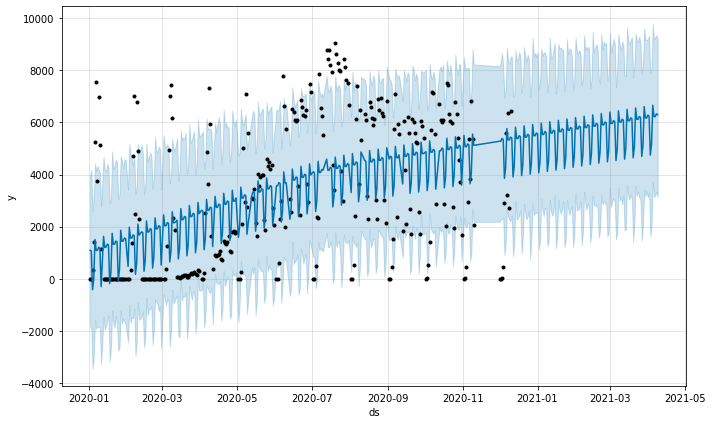

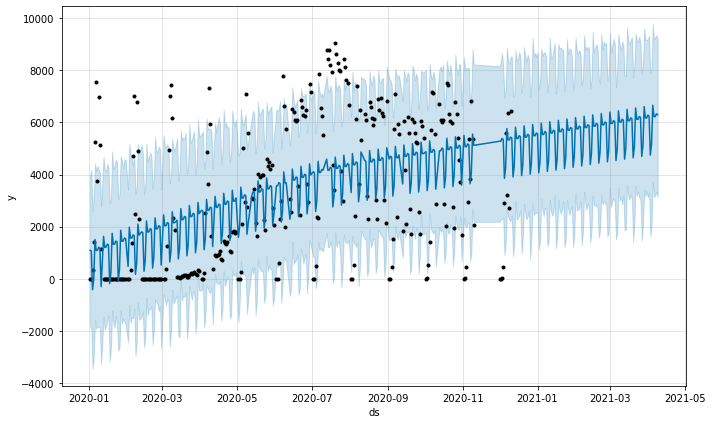

In [136]:
# Graficando
model.plot(forecast)

In [137]:
pd.plotting.register_matplotlib_converters()

(737741.0, 737824.0)

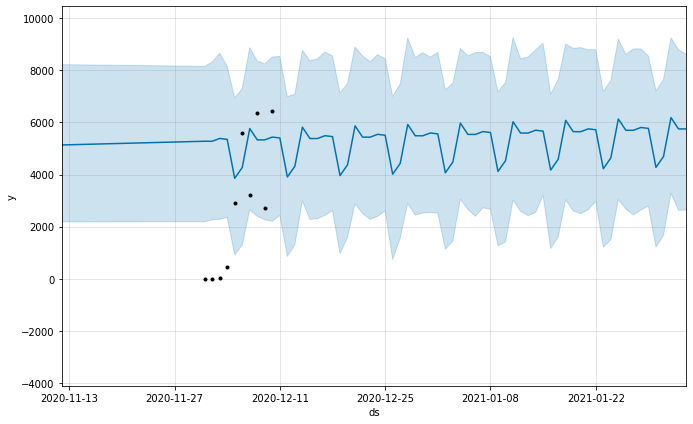

In [138]:
model.plot(forecast)
plt.xlim('2020-11-12', '2021-02-03')

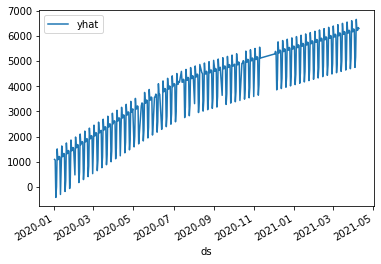

In [139]:
# Solo prediccion
forecast.plot(x='ds', y='yhat')

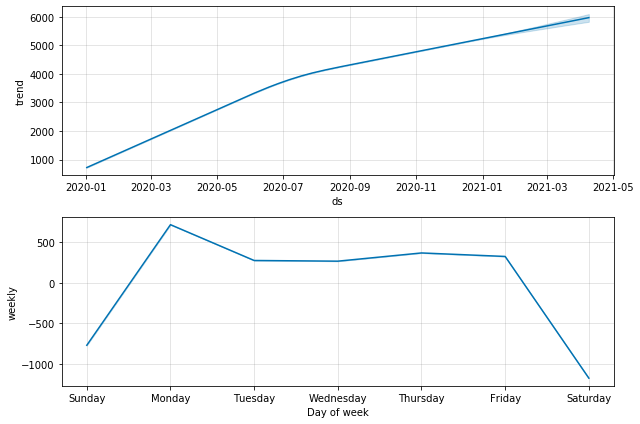

In [140]:
# Tendendia
model.plot_components(forecast);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


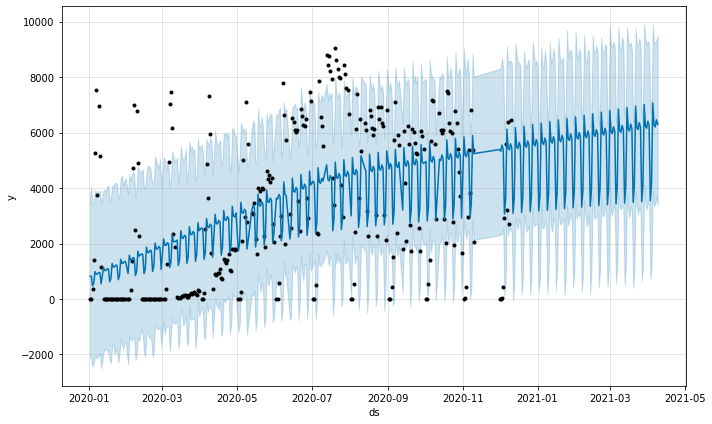

In [141]:
# Cambia la frecuenciamultitplicativa

model_1 = Prophet(seasonality_mode='multiplicative')
model_1.fit(dt)
forecast_1 = model_1.predict(future)
fig = model_1.plot(forecast_1)